https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [3]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [4]:
print(len(twenty_train.data))
print(len(twenty_train.filenames))

2257
2257


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [6]:
count_vect.vocabulary_.get(u'algorithm')

4690

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [8]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini", n_jobs=4)
clf.fit(X_train_tfidf, twenty_train.target)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
docs_new = ['God is not GPU', 'OpenGL on the GPU is love']
#docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is not GPU' => comp.graphics
'OpenGL on the GPU is love' => comp.graphics


In [11]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(criterion="entropy", n_jobs=4)),
])

text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [12]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.7050599201065246

In [13]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.72      0.58      0.64       319
         comp.graphics       0.67      0.86      0.75       389
               sci.med       0.70      0.56      0.62       396
soc.religion.christian       0.74      0.81      0.77       398

           avg / total       0.71      0.71      0.70      1502



In [14]:
metrics.confusion_matrix(twenty_test.target, predicted)

array([[185,  24,  36,  74],
       [  9, 333,  33,  14],
       [ 40, 113, 220,  23],
       [ 22,  29,  26, 321]], dtype=int64)

In [15]:
def matrix_confusao(y_test, y_pred, labels):
    from sklearn.metrics import confusion_matrix  
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    %matplotlib inline

    cm = confusion_matrix(y_test, y_pred) 

    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=labels, yticklabels=labels, cmap='YlGnBu')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')

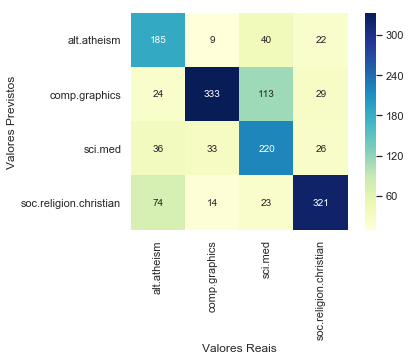

In [16]:
matrix_confusao(twenty_test.target, predicted, twenty_test.target_names)